In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
df.drop(columns=['Cabin'],inplace = True)

0    549
1    342
Name: Survived, dtype: int64

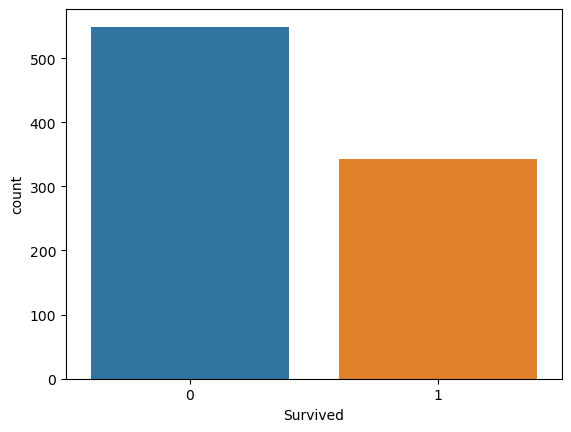

In [15]:
ax = sns.countplot('Survived',data=df)
df['Survived'].value_counts()

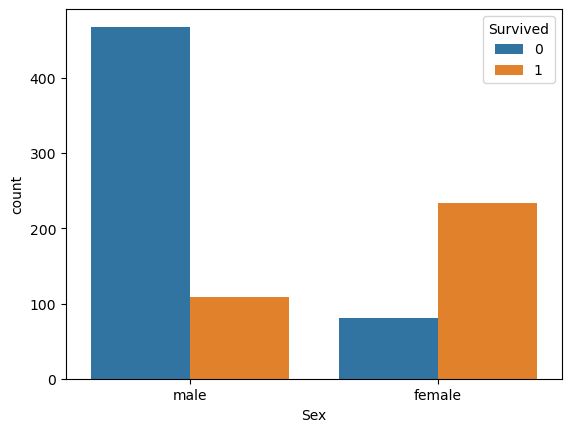

In [16]:
ax= sns.countplot('Sex', hue='Survived', data=df)

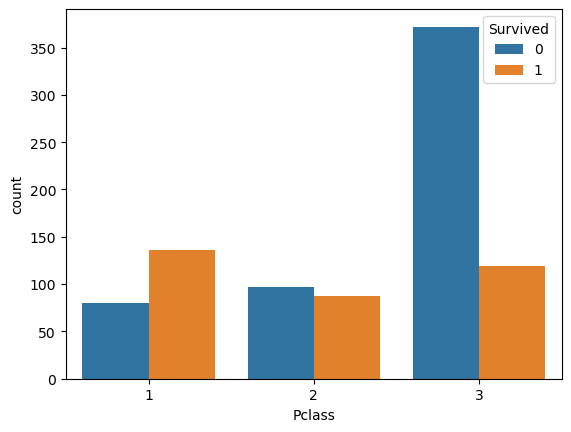

In [17]:
ax = sns.countplot('Pclass',hue='Survived', data=df)

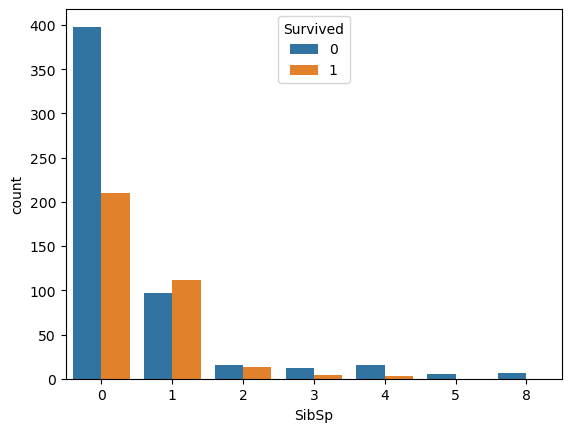

In [19]:
ax= sns.countplot('SibSp', hue='Survived', data=df)

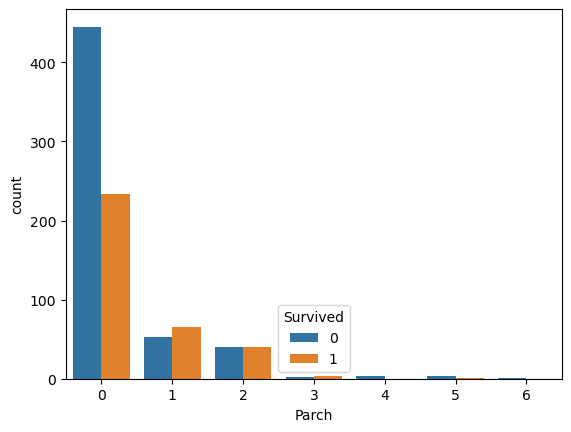

In [20]:
ax= sns.countplot('Parch', hue='Survived', data=df)

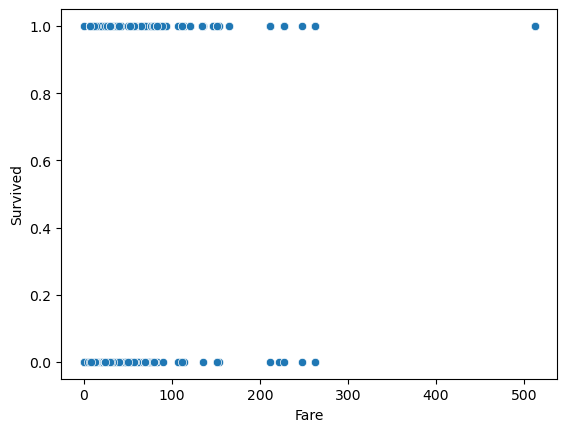

In [22]:
ax= sns.scatterplot(x='Fare', y='Survived', data=df)

In [24]:
dd_sv_cst = pd.crosstab(df['Sex'],df["Survived"],margins=True)
dd_sv_cst

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [25]:
class_gen = pd.crosstab(df['Pclass'],df['Sex'],margins=True)
class_gen

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [26]:
df['Age'].fillna(df["Age"].mean(),inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


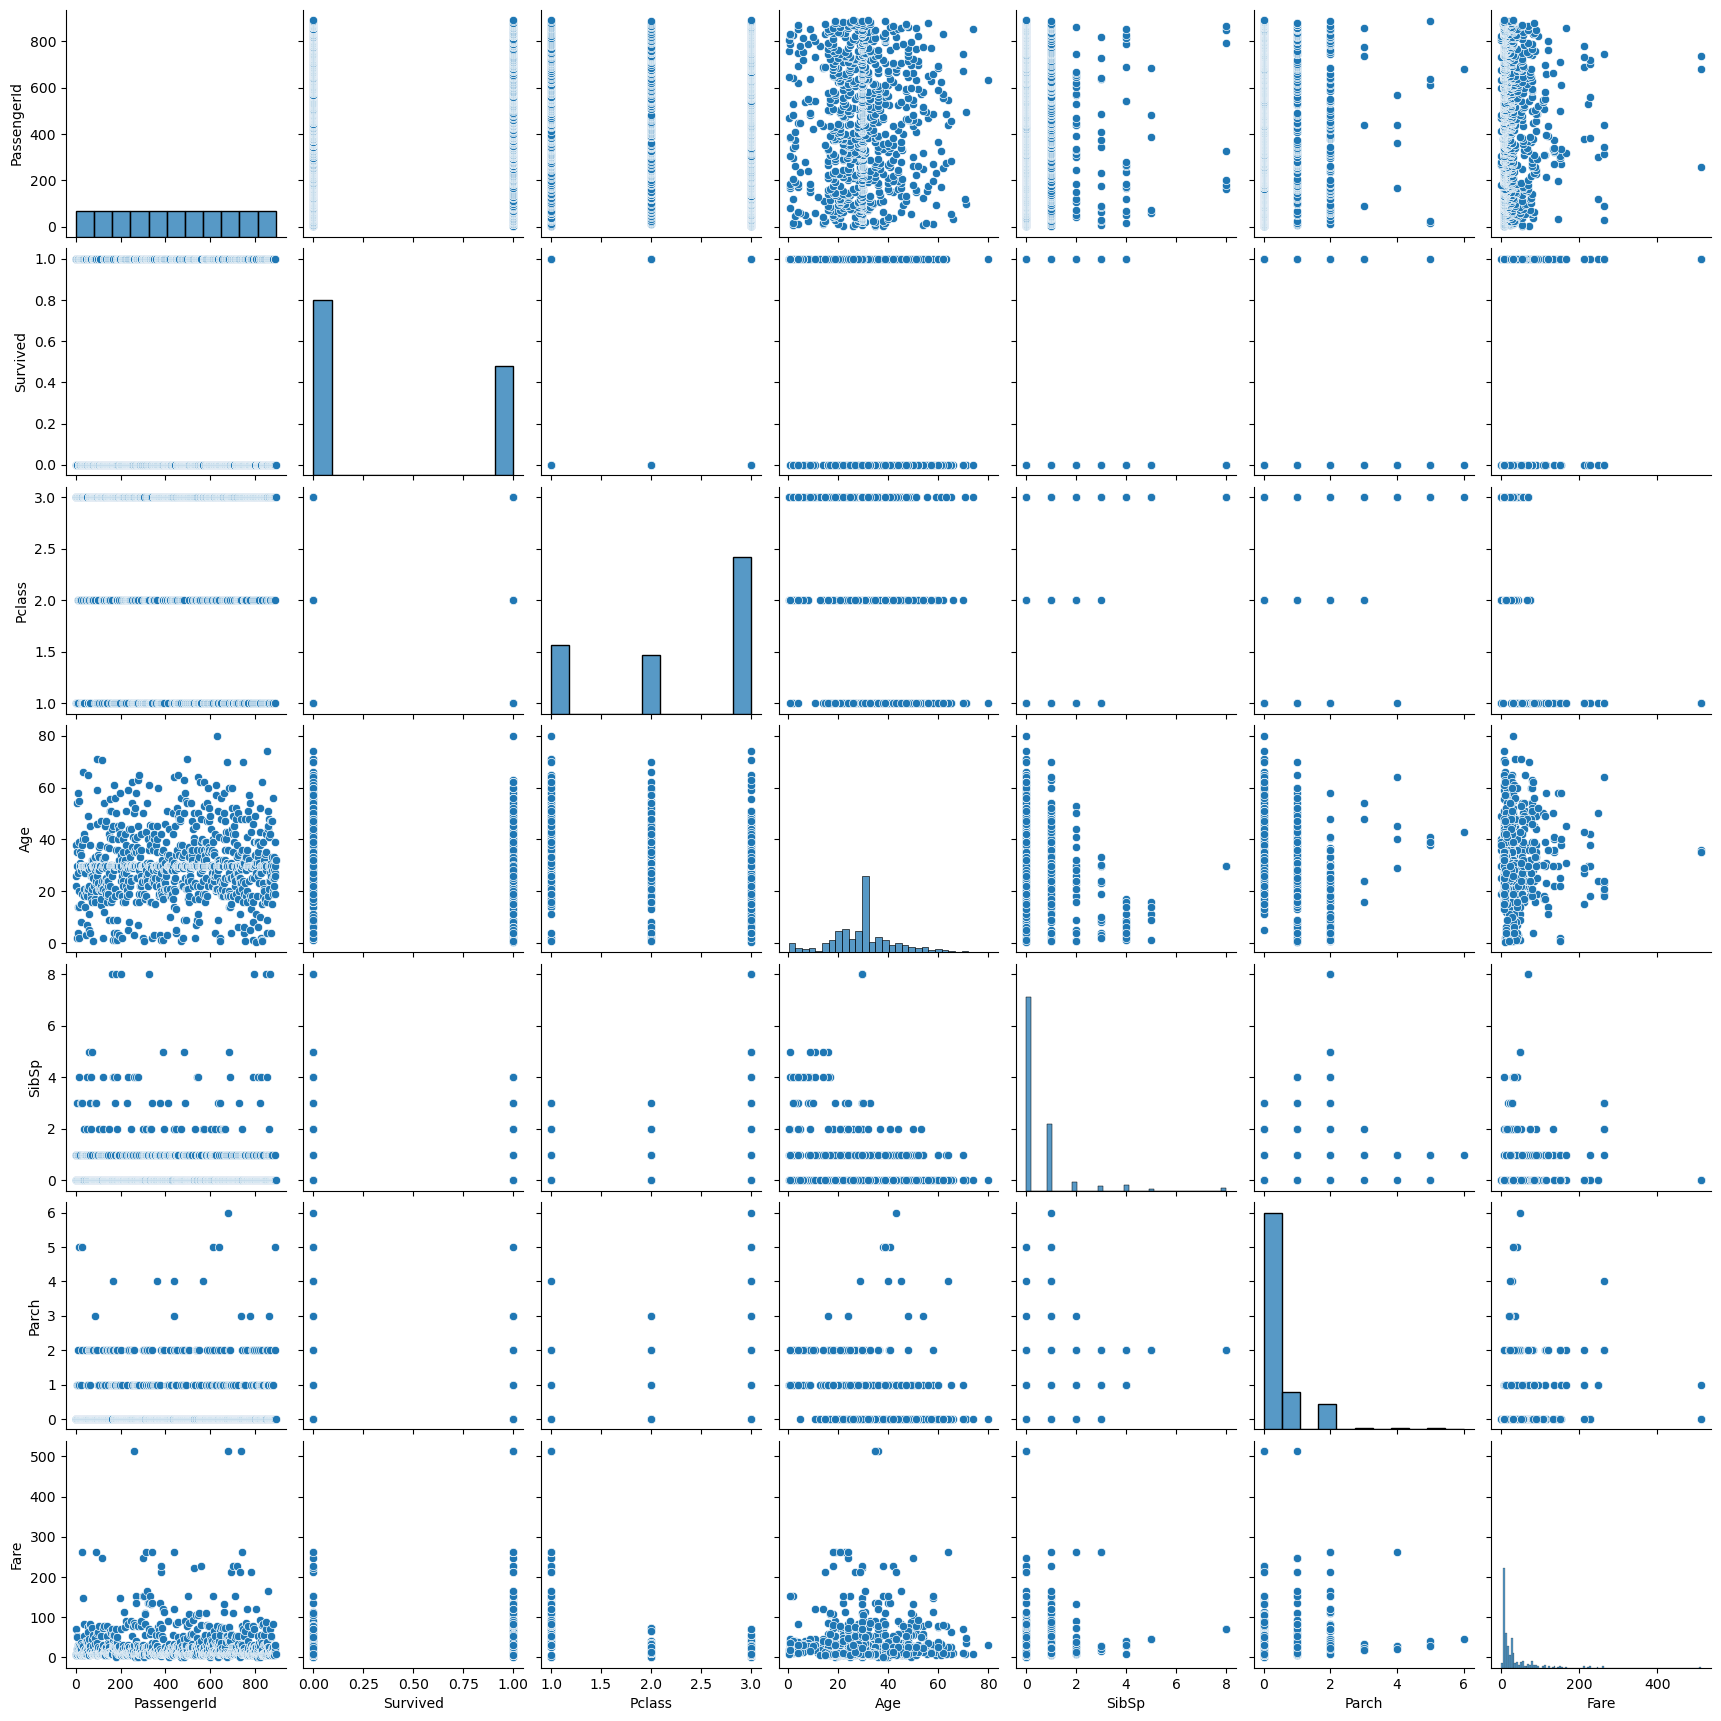

In [28]:
sns.pairplot(data=df)
plt.show()

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [32]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
df['Embarked'].fillna('S', inplace=True)

In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
df['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


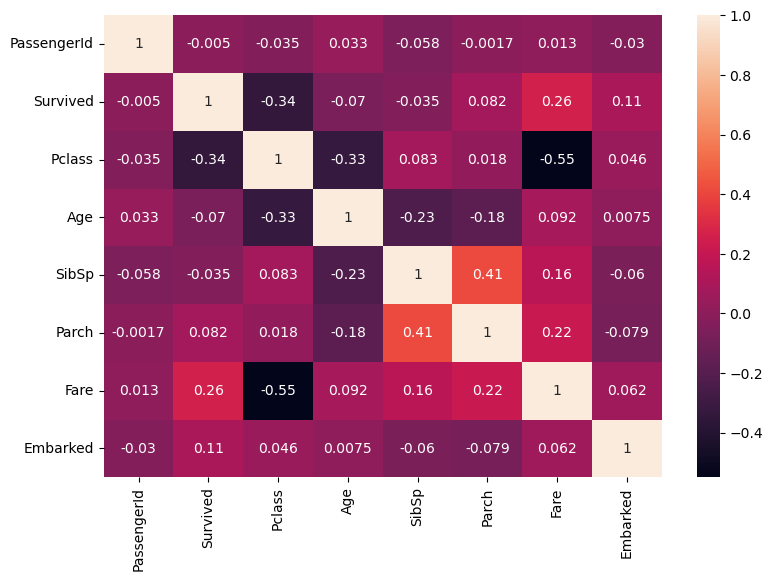

In [37]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [38]:
df.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)


In [40]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked', 'Initial']

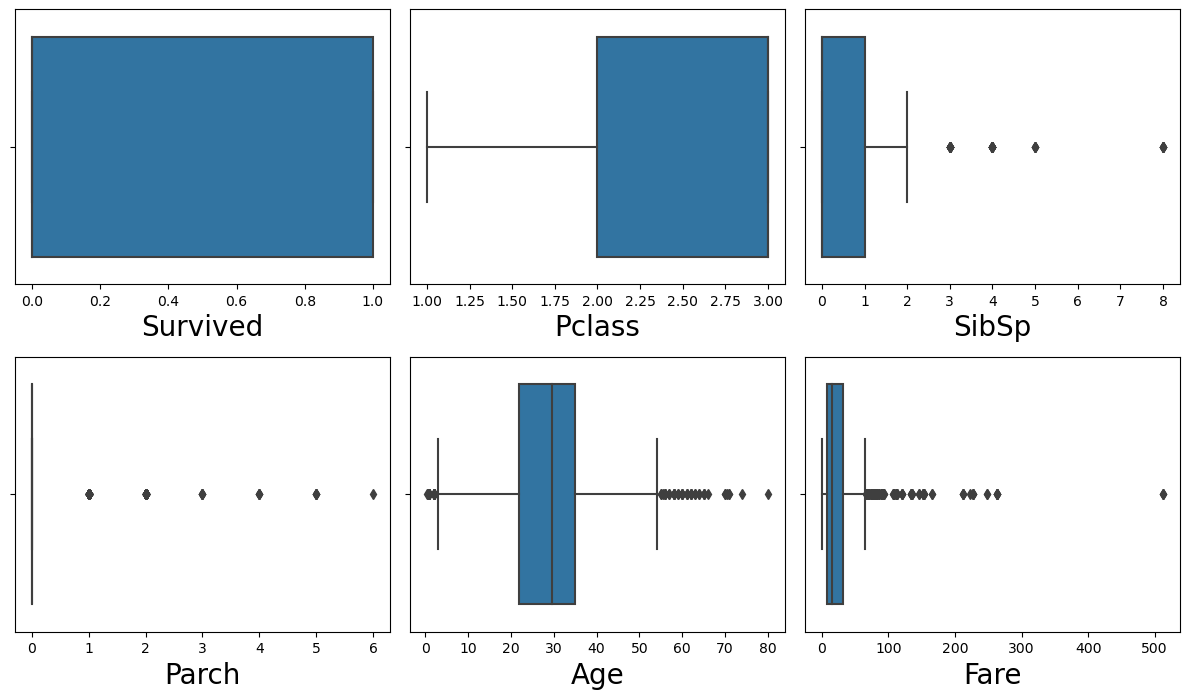

In [41]:
plt.figure(figsize=(12,10))
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [59]:
from scipy.stats import zscore
Numerical_features = df[['SibSp','Parch','Age','Fare']]
z = np.abs(zscore(Numerical_features))
z

,SibSp,Parch,Age,Fare
0,0.432793,0.473674,0.592481,0.502445
1,0.432793,0.473674,0.638789,0.786845
2,0.474545,0.473674,0.284663,0.488854
3,0.432793,0.473674,0.407926,0.420730
4,0.474545,0.473674,0.407926,0.486337
...,...,...,...,...
886,0.474545,0.473674,0.207709,0.386671
887,0.474545,0.473674,0.823344,0.044381
888,0.432793,2.008933,0.000000,0.176263
889,0.474545,0.473674,0.284663,0.044381


In [65]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([1, 0, 1, 3, 0, 0, 0, 0, 1, 3, 2, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        3, 0, 0, 0, 3, 3, 0, 3, 1, 3, 3, 0, 1, 1, 3, 0, 2, 3, 0, 0, 3, 1,
        1, 2, 1, 2, 1, 3, 0, 0, 3, 3, 3, 3, 1, 3, 3, 2, 1, 3, 0, 0, 0, 0,
        0, 0, 2, 1, 0, 1], dtype=int64))

In [66]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(820, 8)

In [67]:
print('Data loss percentage ', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage  7.968574635241302


In [78]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.000000,1,0,7.2500,0
1,1,1,0.0,38.000000,1,0,71.2833,1
2,1,3,0.0,26.000000,0,0,7.9250,0
3,1,1,0.0,35.000000,1,0,53.1000,0
4,0,3,1.0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,13.0000,0
887,1,1,0.0,19.000000,0,0,30.0000,0
888,0,3,0.0,29.699118,1,2,23.4500,0
889,1,1,1.0,26.000000,0,0,30.0000,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [80]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [81]:
df['Fare'] = np.cbrt(df['Fare'])

In [82]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        1.230382
Embarked    1.543397
dtype: float64

In [83]:
x = df.drop(['Survived'], axis =1)
y = df['Survived']

In [84]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(x)

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,2.327506,Pclass
1,1.133793,Sex
2,1.204356,Age
3,1.403100,SibSp
4,1.391047,Parch
5,2.497566,Fare
6,1.053857,Embarked


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8582089552238806 on Random_state 455


In [90]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3, random_state=455)

In [94]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n==================Train Result=====================')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n==================Test Result======================')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        
        
        print('\n Classification Report', classification_report(y_test,pred,digits=2))

In [96]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [97]:
metric_score(Lr,x_train,x_test,y_train,y_test, train = True)
metric_score(Lr,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 80.10%

==================Test Result======================
Accuracy Score: 77.61%

 Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       164
           1       0.72      0.69      0.71       104

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.78       268



In [99]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
metric_score(Dt,x_train,x_test,y_train,y_test, train = True)
metric_score(Dt,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 98.56%

==================Test Result======================
Accuracy Score: 74.63%

 Classification Report               precision    recall  f1-score   support

           0       0.79      0.80      0.80       164
           1       0.68      0.65      0.67       104

    accuracy                           0.75       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.75      0.75       268



In [101]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [102]:
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 82.99%

==================Test Result======================
Accuracy Score: 77.24%

 Classification Report               precision    recall  f1-score   support

           0       0.78      0.87      0.82       164
           1       0.75      0.62      0.68       104

    accuracy                           0.77       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268



In [104]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
metric_score(RFC,x_train,x_test,y_train,y_test, train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 98.56%

==================Test Result======================
Accuracy Score: 78.73%

 Classification Report               precision    recall  f1-score   support

           0       0.80      0.88      0.83       164
           1       0.77      0.64      0.70       104

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



In [106]:
Abc = AdaBoostClassifier()
Abc.fit(x_train,y_train)

AdaBoostClassifier()

In [107]:
metric_score(Abc,x_train,x_test,y_train,y_test, train = True)
metric_score(Abc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 84.11%

==================Test Result======================
Accuracy Score: 79.10%

 Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       164
           1       0.76      0.67      0.71       104

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [108]:
Gbc = GradientBoostingClassifier()
Gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [109]:
metric_score(Gbc,x_train,x_test,y_train,y_test, train = True)
metric_score(Gbc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 90.69%

==================Test Result======================
Accuracy Score: 80.22%

 Classification Report               precision    recall  f1-score   support

           0       0.78      0.93      0.85       164
           1       0.85      0.60      0.70       104

    accuracy                           0.80       268
   macro avg       0.82      0.76      0.78       268
weighted avg       0.81      0.80      0.79       268



In [110]:
Etc = ExtraTreesClassifier()
Etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [111]:
metric_score(Etc,x_train,x_test,y_train,y_test, train = True)
metric_score(Etc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 98.56%

==================Test Result======================
Accuracy Score: 76.87%

 Classification Report               precision    recall  f1-score   support

           0       0.80      0.84      0.82       164
           1       0.72      0.66      0.69       104

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



In [112]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [113]:
metric_score(bc,x_train,x_test,y_train,y_test, train = True)
metric_score(bc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 96.79%

==================Test Result======================
Accuracy Score: 76.49%

 Classification Report               precision    recall  f1-score   support

           0       0.78      0.86      0.82       164
           1       0.74      0.62      0.67       104

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [114]:
score = cross_val_score(Lr,x,y)
print(score)
print(score.mean())

[0.78212291 0.78651685 0.7752809  0.76966292 0.82022472]
0.786761659657272


In [115]:
score = cross_val_score(Dt,x,y)
print(score)
print(score.mean())

[0.7150838  0.79775281 0.79213483 0.74157303 0.81460674]
0.7722302429226038


In [116]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())

[0.73184358 0.74157303 0.76966292 0.80337079 0.79213483]
0.7677170296905403


In [118]:
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())

[0.78212291 0.79775281 0.85393258 0.7752809  0.8258427 ]
0.8069863787583955


In [119]:
score = cross_val_score(Abc,x,y)
print(score)
print(score.mean())

[0.75418994 0.82022472 0.82022472 0.81460674 0.8258427 ]
0.8070177641077144


In [120]:
score = cross_val_score(Gbc,x,y)
print(score)
print(score.mean())

[0.79888268 0.81460674 0.83146067 0.80337079 0.85955056]
0.8215742891218379


In [121]:
score = cross_val_score(Etc,x,y)
print(score)
print(score.mean())

[0.75418994 0.76404494 0.83707865 0.78089888 0.80898876]
0.7890402360178269


In [122]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.77094972 0.81460674 0.85393258 0.76966292 0.8258427 ]
0.8069989328981231


In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
grid_param = {'n_estimators':[100,150,200,250,300],
              'max_depth' : range(16,64),
              'min_samples_split':range(2,8,2),
              'learning_rate':np.arange(0.1,0.3)
              
    
}

In [125]:
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(16, 64),
                         'min_samples_split': range(2, 8, 2),
                         'n_estimators': [100, 150, 200, 250, 300]})

In [126]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 17,
 'min_samples_split': 6,
 'n_estimators': 150}

In [127]:
model = GradientBoostingClassifier(learning_rate =0.1,max_depth = 17,min_samples_split= 6)
model.fit(x_train,y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

79.1044776119403


In [128]:
import joblib
joblib.dump(model,'Titanic_survived.pkl')

['Titanic_survived.pkl']

In [129]:
model = joblib.load('Titanic_survived.pkl')